# Assignment: Climate change in the zero-dimensional EBM

This notebook is part of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook) by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

## Learning goals

Students completing this assignment will gain the following skills and concepts:

- Familiarity with the Jupyter notebook
- Familiarity with the zero-dimensional Energy Balance Model
- Understanding of the adjustment toward equilibrium temperature
- Introduction to the concept of albedo feedback
- Use of numerical timestepping to find the equilibrium temperature
- Python programming skills: arrays, loops, and simple graphs

## Instructions

- In a local copy of this notebook (on the JupyterHub or your own device) **add your answers in additional cells**.
- **Complete the required problems** below. 
- Some assignments have **optional bonus problems**. These are meant to be interesting and thought-provoking, but are not required. Extra credit will be given for interesting answers to the bonus problems.
- Remember to set your cell types to `Markdown` for text, and `Code` for Python code!
- **Include comments** in your code to explain your method as necessary.
- Remember to actually answer the questions. **Written answers are required** (not just code and figures!)
- Submit your solutions in **a single Jupyter notebook** that contains your text, your code, and your figures.
- *Make sure that your notebook* ***runs cleanly without errors:***
    - Save your notebook
    - From the `Kernel` menu, select `Restart & Run All`
    - Did the notebook run from start to finish without error and produce the expected output?
    - If yes, save again and submit your notebook file
    - If no, fix the errors and try again.

## Problem 1: Time-dependent warming in the zero-dimensional Energy Balance Model

In lecture we defined a zero-dimensional energy balance model for the global mean surface temperature $T_s$ as follows

$$ C  \frac{dT_s}{dt} = \text{ASR} - \text{OLR}$$

$$ \text{ASR} = (1-\alpha) Q $$

$$ \text{OLR} = \tau \sigma T_s^4$$

where we defined these terms:

- $C$ is a heat capacity for the atmosphere-ocean column
- $\alpha$ is the global mean planetary albedo
- $\sigma = 5.67 \times 10^{-8}$ W m$^{-2}$ K$^{-4}$ is the Stefan-Boltzmann constant
- $\tau$ is our transmissivity parameter for the atmosphere.
- $Q$ is the global-mean incoming solar radiation, or *insolation*.

Refer back to our class notes for parameter values.

1. If the heat penetrated to twice as deep into the ocean, the value of $C$ would be twice as large. Would this affect the **equilibrium temperature**? Why or why not?
2. In class we used numerical timestepping to investigate a *hypothetical climate change scenario* in which $\tau$ decreases to 0.57 and $\alpha$ increases to 0.32. We produced a graph of $T_s(t)$ over a twenty year period, starting from an initial temperature of 288 K. Here you will repeat this calculate with a larger value of $C$ and compare the warming rates. Specifically:
    - Repeat our in-class time-stepping calculation with the same parameters we used before (including a heat capacity of $C = 4\times10^8$ J m$^{-2}$ K$^{-1}$), but extend it to 50 years. **You should create an array of temperatures with 51 elements, beginning from 288 K**.
    - Now do it again, but use $C = 8\times10^8$ J m$^{-2}$ K$^{-1}$ (representing 200 meters of water). You should **create another 51-element array** of temperatures also beginning from 288 K.
    - **Make a well-labeled graph** that compares the two temperatures over the 50-year period.
    
4. What do your results show about the role of heat capacity on climate change? **Give a short written answer.**

In [1]:
dt = 60. * 60. * 24. * 365.   # one year expressed in seconds
Q = 341.3  # the insolation
alpha = 0.32 # the albedo
tau = 0.57 # the long wave reflection
sigma = 5.67E-8  # S-B constant
c_w = 4E3  #  Specific heat of water in J/kg/K
rho_w = 1E3  #  Density of water in kg/m3
H = 100.   #  Depth of water in m
C = c_w * rho_w * H   #  Heat capacity of the model

In [2]:
def ASR(Q, alpha):
    return (1-alpha)*Q

def OLR(T, tau):
    return tau * sigma * T**4

In [3]:
def step_forward(T):
    return T + dt / C * ( ASR(Q, alpha) - OLR(T, tau) )

In [4]:
import numpy as np

numsteps = 50
Tsteps = np.zeros(numsteps+1)
Years = np.zeros(numsteps+1)
Tsteps[0] = 288. 
for n in range(numsteps):
    Years[n+1] = n+1
    Tsteps[n+1] = step_forward( Tsteps[n] )
print(Tsteps)

[288.         288.76780266 289.34792102 289.78523685 290.11433323
 290.36166675 290.54736768 290.68669049 290.79115953 290.86946109
 290.92813114 290.97208122 291.00499865 291.02964965 291.0481083
 291.06192909 291.07227674 291.08002371 291.08582346 291.09016532
 291.09341571 291.09584897 291.09767051 291.0990341  291.10005487
 291.100819   291.10139102 291.10181922 291.10213977 291.10237972
 291.10255934 291.10269381 291.10279446 291.10286981 291.10292622
 291.10296844 291.10300005 291.10302371 291.10304142 291.10305468
 291.1030646  291.10307203 291.10307759 291.10308176 291.10308487
 291.10308721 291.10308895 291.10309026 291.10309124 291.10309197
 291.10309252]


In [9]:
H = 200.   #  Depth of water in m
C = c_w * rho_w * H   #  Heat capacity of the model
Usteps = np.zeros(numsteps+1)
Usteps[0] = 288. 
for n in range(numsteps):
    Years[n+1] = n+1
    Usteps[n+1] = step_forward( Usteps[n] )
print(Usteps)

[288.         288.38390133 288.72097528 289.01677926 289.27624693
 289.50374981 289.70315491 289.87787792 290.03093201 290.16497231
 290.28233615 290.38507932 290.47500863 290.55371103 290.62257954
 290.68283635 290.73555329 290.78166997 290.82200981 290.8572942
 290.88815496 290.91514538 290.93874983 290.95939231 290.97744391
 290.99322937 291.00703282 291.01910285 291.02965696 291.03888536
 291.04695448 291.05400984 291.06017874 291.06557251 291.0702885
 291.07441185 291.07801701 291.08116909 291.08392501 291.08633455
 291.08844125 291.09028314 291.09189353 291.0933015  291.09453248
 291.09560874 291.0965497  291.09737239 291.09809166 291.09872051
 291.09927032]


In [ ]:
H = 200.   #  Depth of water in m
C = c_w * rho_w * H   #  Heat capacity of the model
Usteps = np.zeros(numsteps+1)
Usteps[0] = 288. 
for n in range(numsteps):
    Years[n+1] = n+1
    Usteps[n+1] = step_forward( Usteps[n] )
print(Usteps)

[288.         288.38390133 288.72097528 289.01677926 289.27624693
 289.50374981 289.70315491 289.87787792 290.03093201 290.16497231
 290.28233615 290.38507932 290.47500863 290.55371103 290.62257954
 290.68283635 290.73555329 290.78166997 290.82200981 290.8572942
 290.88815496 290.91514538 290.93874983 290.95939231 290.97744391
 290.99322937 291.00703282 291.01910285 291.02965696 291.03888536
 291.04695448 291.05400984 291.06017874 291.06557251 291.0702885
 291.07441185 291.07801701 291.08116909 291.08392501 291.08633455
 291.08844125 291.09028314 291.09189353 291.0933015  291.09453248
 291.09560874 291.0965497  291.09737239 291.09809166 291.09872051
 291.09927032]


In [5]:
# a special instruction for the Jupyter notebook
#   Display all plots inline in the notebook
%matplotlib inline  
#  import the plotting package
import matplotlib.pyplot as plt

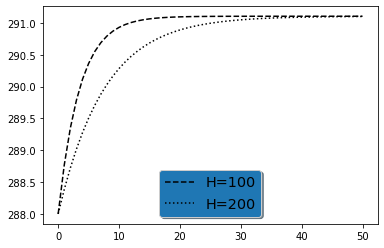

In [15]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(Years, Tsteps, 'k--', label='H=100')
ax.plot(Years, Usteps, 'k:', label='H=200')

legend = ax.legend(loc='lower center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

## Problem 2: Albedo feedback in the Energy Balance Model

For this exercise, we will introduce a new physical process into our model by **letting the planetary albedo depend on temperature**. The idea is that a warmer planet has less ice and snow at the surface, and thus a lower planetary albedo.

Represent the ice-albedo feedback through the following formula:

$$ \alpha(T) = \left\{ \begin{array}{ccc}
\alpha_i &   & T \le T_i \\
\alpha_o + (\alpha_i-\alpha_o) \frac{(T-T_o)^2}{(T_i-T_o)^2} &   & T_i < T < T_o \\
\alpha_o &   & T \ge T_o \end{array} \right\}$$

with the following parameter values:

- $\alpha_o = 0.289$ is the albedo of a warm, ice-free planet
- $\alpha_i = 0.7$ is the albedo of a very cold, completely ice-covered planet
- $T_o = 293$ K is the threshold temperature above which our model assumes the planet is ice-free
- $T_i = 260$ K is the threshold temperature below which our model assumes the planet is completely ice covered. 

For intermediate temperature, this formula gives a smooth variation in albedo with global mean temperature. It is tuned to reproduce the observed albedo $\alpha = 0.299$ for $T = 288$ K. 

1. 
    - Define a Python function that implements the above albedo formula. *There is definitely more than one way to do it. It doesn't matter how you do it as long as it works!*
    -  Use your function to calculate albedos for a wide range on planetary temperature (e.g. from $T=250$ K to $T=300$ K.)
    - Present your results (albedo as a function of global mean temperature, or $\alpha(T)$) in a nicely labeled graph.
    
2. Now investigate a climate change scenario with this new model:
    - Suppose that the transmissivity decreases from 0.611 to 0.57 (same as before)
    - Your task is to **calculate the new equilibrium temperature**. First, explain very briefly why you can't just solve for it analytically as we did when albedo was a fixed number.
    - Instead, you will use numerical time-stepping to find the equilibrium temperature
    - Repeat the procedure from Question 3 *(time-step forward for 50 years from an initial temperature of 288 K and make a graph of the results)*, but this time **use the function you defined above to compute the albedo for the current temperature**.
    - Is the **new equilibrium temperature larger or smaller** than it was in the model with fixed albedo? **Explain why in your own words.**

In [16]:
alpha_o = 0.289 # The albedo of a warm, ice-free planet
alpha_i = 0.7 # The albedo of a very cold, completely ice-covered planet
T_o = 293 # The threshold temperature above which our model assumes the planet is ice-free
T_i = 260 # The threshold temperature below which our model assumes the planet is completely ice covered.

In [22]:
def albedo(T):
    if T <= T_i:
        return(alpha_i)
    elif T >= T_o :
        return(alpha_o)
    else:
        return(alpha_o + (alpha_i - alpha_o) * (T - T_o)**2 / (T_i - T_o)**2)

In [32]:
Albedos = []
Temps = []
for n in range(250, 300, 1):
    Temps.append(n)
    Albedos.append(albedo(n))

In [33]:
print(Albedos)

[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.6754683195592286, 0.6516914600550965, 0.6286694214876032, 0.6064022038567493, 0.5848898071625344, 0.5641322314049586, 0.544129476584022, 0.5248815426997245, 0.5063884297520661, 0.4886501377410468, 0.4716666666666666, 0.45543801652892557, 0.4399641873278236, 0.42524517906336085, 0.41128099173553717, 0.3980716253443526, 0.38561707988980715, 0.3739173553719008, 0.3629724517906336, 0.35278236914600547, 0.3433471074380165, 0.33466666666666667, 0.3267410468319559, 0.3195702479338843, 0.31315426997245177, 0.30749311294765835, 0.30258677685950414, 0.29843526170798895, 0.2950385674931129, 0.292396694214876, 0.2905096418732782, 0.28937741046831955, 0.289, 0.289, 0.289, 0.289, 0.289, 0.289, 0.289]


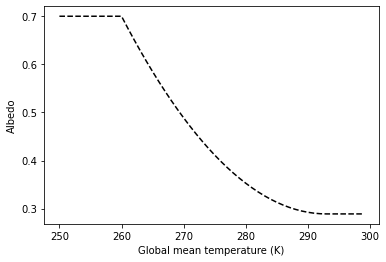

In [35]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(Temps, Albedos, 'k--')

plt.ylabel('Albedo')
plt.xlabel('Global mean temperature (K)')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

In [36]:
def step_forward(T):
    alpha = albedo(T)
    return T + dt / C * ( ASR(Q, alpha) - OLR(T, tau) )

In [37]:
H = 200.   #  Depth of water in m
C = c_w * rho_w * H   #  Heat capacity of the model
Usteps = np.zeros(numsteps+1)
Usteps[0] = 288. 
for n in range(numsteps):
    Years[n+1] = n+1
    Usteps[n+1] = step_forward( Usteps[n] )
print(Usteps)

[288.         288.67403431 289.29764572 289.86998182 290.39134517
 290.86301387 291.28704446 291.66607422 292.00313597 292.30149407
 292.56450653 292.79551452 292.99775834 293.17431724 293.32822401
 293.46235143 293.57921604 293.68102033 293.76969046 293.84690978
 293.91414859 293.97269044 294.02365539 294.0680204  294.10663736
 294.14024889 294.16950217 294.19496111 294.21711692 294.23639748
 294.25317539 294.26777509 294.28047907 294.29153325 294.30115171
 294.30952079 294.31680268 294.32313853 294.3286512  294.33344758
 294.33762073 294.34125159 294.34441062 294.34715911 294.34955041
 294.35163093 294.35344106 294.35501592 294.3563861  294.35757819
 294.35861534]


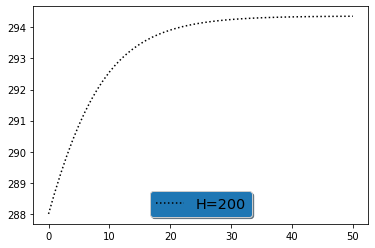

In [38]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots()
# ax.plot(Years, Tsteps, 'k--', label='H=100')
ax.plot(Years, Usteps, 'k:', label='H=200')

legend = ax.legend(loc='lower center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

As the temperature increases the albedo decreases with less ice, becoming closer to 0.29 rather than the 0.32 in the static albedo scenario. The planet therefore heats up more.

## Bonus problem

*Open-ended investigation for extra credit, not required*

Something very different occurs in this model if you introduce a strong negative radiative forcing, either by substantially reducing greenhouse gases (which we would represent as an increase in the transmissivity $\tau$), or by decreasing the incoming solar radiation $Q$.

Investigate, using your numerical model code, and report your results along with your thoughts.

____________

## Credits

This notebook is part of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook), an open-source textbook developed and maintained by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It is licensed for free and open consumption under the
[Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license.

Development of these notes and the [climlab software](https://github.com/brian-rose/climlab) is partially supported by the National Science Foundation under award AGS-1455071 to Brian Rose. Any opinions, findings, conclusions or recommendations expressed here are mine and do not necessarily reflect the views of the National Science Foundation.
____________